In [1]:
import pandas as pd

In [5]:
with open('cats-in-movies.csv') as file:
    data =file.read()
df = pd.DataFrame(data)

ValueError: DataFrame constructor not properly called!

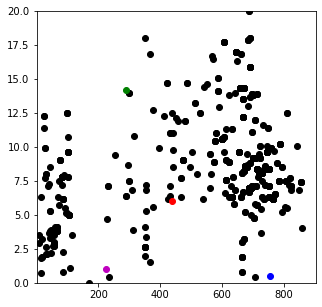

{1: [439.8057677266186, 6.015957809723352], 2: [291.1289010185395, 14.179262106334217], 3: [754.3391095733516, 0.47822899344320824], 4: [225.95259929622534, 0.9907360769768814]}
{1: [507.3805970149254, 11.547761194029851], 2: [328.61818181818177, 6.627272727272728], 3: [703.0775449101798, 9.40179640718563], 4: [76.94680851063833, 6.430851063829787]}


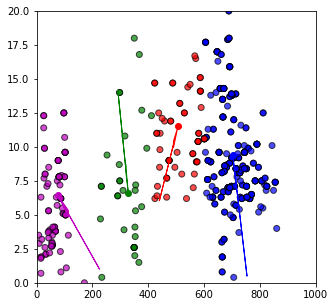

{1: [529.131884057971, 11.589855072463767], 2: [324.3878787878789, 7.069696969696971], 3: [705.5726993865032, 9.372392638036814], 4: [68.01573033707868, 6.469662921348314]}


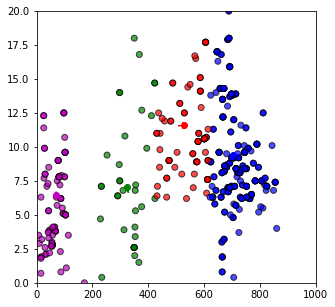

{1: [551.6046511627909, 11.626744186046514], 2: [329.0729729729731, 8.783783783783782], 3: [711.8232026143795, 9.21437908496733], 4: [66.5159090909091, 5.905681818181819]}


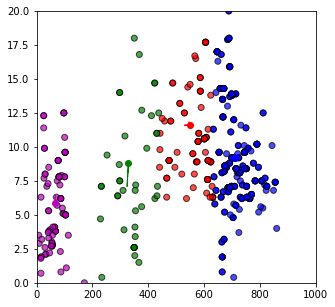

{1: [568.4329787234045, 11.196808510638299], 2: [341.4261904761905, 8.88095238095238], 3: [715.5597269624577, 9.27986348122868], 4: [66.5159090909091, 5.905681818181819]}


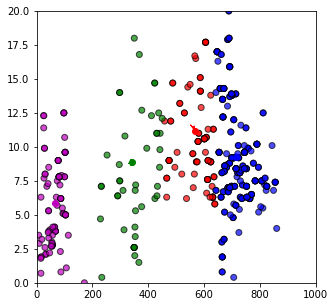

{1: [577.8458333333336, 11.051041666666668], 2: [353.6888888888889, 7.962222222222219], 3: [717.2209059233454, 9.300348432055756], 4: [68.01573033707868, 6.469662921348314]}


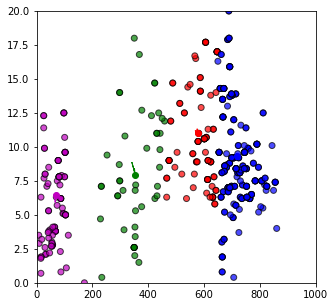

{1: [585.4580952380954, 11.386666666666663], 2: [355.97391304347826, 8.047826086956519], 3: [719.796750902528, 9.106859205776184], 4: [68.01573033707868, 6.469662921348314]}


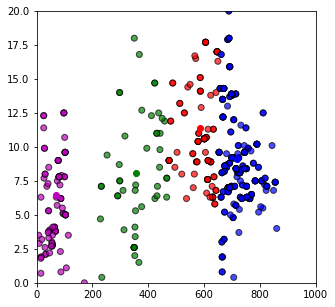

{1: [589.5485436893205, 11.555339805825241], 2: [362.74081632653065, 7.997959183673469], 3: [720.0500000000009, 9.080797101449287], 4: [68.01573033707868, 6.469662921348314]}


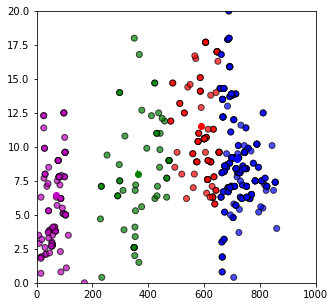

{1: [598.7846153846153, 11.565384615384612], 2: [373.12592592592586, 8.09074074074074], 3: [721.5155555555564, 9.069259259259269], 4: [68.01573033707868, 6.469662921348314]}


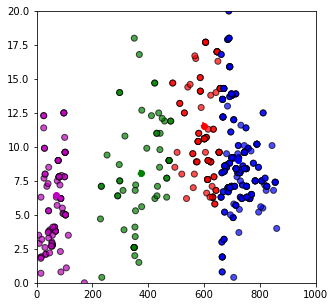

{1: [604.2703703703702, 11.711111111111105], 2: [376.9714285714285, 8.226785714285715], 3: [722.9545454545464, 8.950378787878803], 4: [68.01573033707868, 6.469662921348314]}


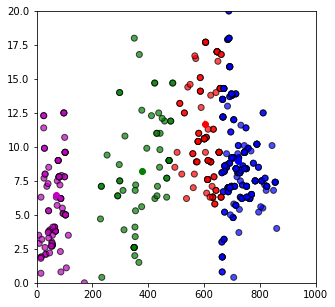

{1: [608.943243243243, 11.602702702702695], 2: [380.7999999999999, 8.45], 3: [724.1409266409278, 8.920463320463334], 4: [68.01573033707868, 6.469662921348314]}


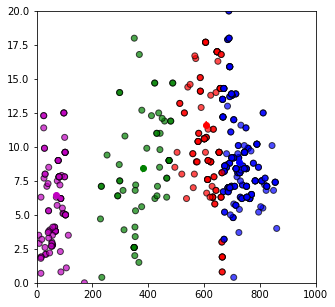

{1: [613.9967213114755, 10.880327868852456], 2: [380.7999999999999, 8.45], 3: [726.7645161290334, 9.156854838709691], 4: [68.01573033707868, 6.469662921348314]}


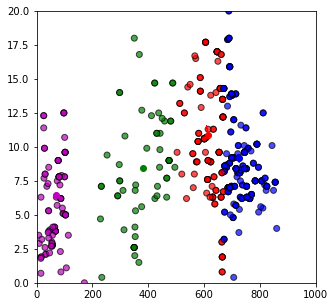

{1: [620.0873134328358, 10.992537313432827], 2: [382.7457627118643, 8.450847457627118], 3: [730.0336170212778, 9.00765957446809], 4: [68.01573033707868, 6.469662921348314]}


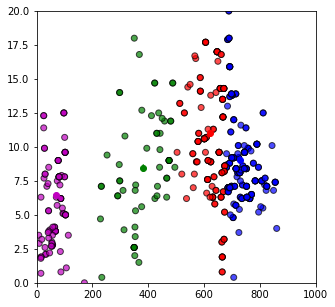

{1: [626.9129870129872, 10.744155844155836], 2: [382.7457627118643, 8.450847457627118], 3: [735.3720930232565, 9.000930232558144], 4: [68.01573033707868, 6.469662921348314]}


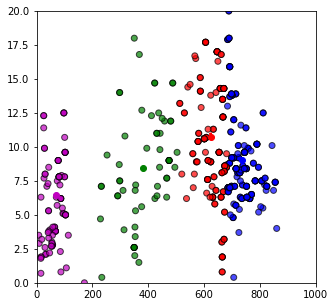

{1: [629.3968354430381, 10.686708860759486], 2: [384.7599999999999, 8.47], 3: [736.6728571428578, 9.008095238095239], 4: [68.01573033707868, 6.469662921348314]}


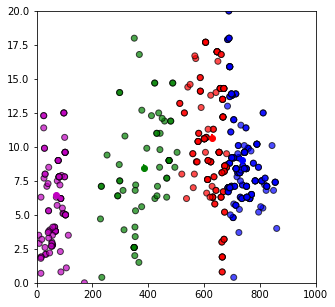

{1: [629.7314465408806, 10.674213836477978], 2: [384.7599999999999, 8.47], 3: [736.9315789473692, 9.009569377990431], 4: [68.01573033707868, 6.469662921348314]}
yeeeeeee


In [37]:
import copy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('forestfires.csv',sep = ',')
df = pd.DataFrame(zip(df['DC'], df['ISI']), columns = ['f1', 'f2'])
df
k = 4

centroids = {
    i+1:[np.random.uniform(0,1000), np.random.uniform(0,20)] for i in range(k)
}
fig = plt.figure(figsize = (5,5))
plt.scatter(df['f1'], df['f2'], color = 'k')
colmap = {1 :'r', 2 : 'g', 3 : 'b', 4 : 'm'}
for i in centroids:
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0.1000)
plt.ylim(0,20)
plt.show()
print(centroids)

def euclid(df, centroids):
    klust = []
    for i in range(len(df)):
        ds = []
        for h in range(1,k+1):
            dist = 0
            for j in range(2):
                #print(dist)
                if(centroids[h][j] == 'nan' ):
                    print('PORCAPUPAZZA')
                dist = dist + (df.loc[i][j]-centroids[h][j])**2
            dist = np.sqrt(dist)
            if(dist == 'nan' ):
                    print('PORCAPUPAZZA')
            ds.append(dist)
        klust.append(np.argmin(ds) + 1)
    df['clusters'] = klust
    df['color'] = df['clusters'].map(lambda x: colmap[x])
    return df
#put the first clusters
df = euclid(df, centroids)
df.head()

def new_centroids(df, centr, k):
    names = ['f1', 'f2']
    for i in range(1,k+1):
        for j in range(2):
            centr[i][j] = np.mean(df[df['clusters']==i][names[j]])
    return centr


#o = 0
while True:
    closest_centroids = df['clusters'].copy(deep=True)
    old_centroids = copy.deepcopy(centroids)
    centroids = new_centroids(df, centroids, k)
    df = euclid(df, centroids)
    print(centroids)
    if closest_centroids.equals(df['clusters']):
        print('yeeeeeee')
        break   
    fig = plt.figure(figsize = (5,5))
    ax = plt.axes()
    colmap = {1 :'r', 2 : 'g', 3 : 'b', 4 : 'm'}
    plt.scatter(df['f1'], df['f2'], alpha = 0.7, color = df['color'], edgecolor = 'k')
    for i in centroids:
        plt.scatter(*centroids[i], color = colmap[i])
    plt.xlim(0,1000)
    plt.ylim(0,20)
    old = []
    for i in old_centroids.keys():
        l = []
        for j in range(0,2):
            l.append(old_centroids[i][j])
        old.append(l)
        dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
        dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
        ax.arrow(old[i-1][0], old[i-1][1], dx, dy, head_width=0.5, head_length=np.sqrt(dx**2+dy**2)*0.3, fc=colmap[i], ec=colmap[i])
    plt.show()
    #o = o+1
#plt.show()

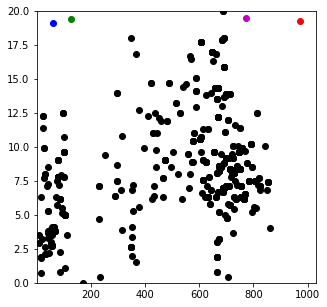

{1: [970.6133373814407, 19.24980077984064], 2: [127.55641890517133, 19.440924407173803], 3: [60.726446949636916, 19.12775081228998], 4: [774.0934238229698, 19.475305939951056]}
{1: [nan, nan], 2: [273.4955223880597, 8.447761194029852], 3: [54.40597014925372, 5.4940298507462675], 4: [682.2861618798955, 9.739164490861615]}


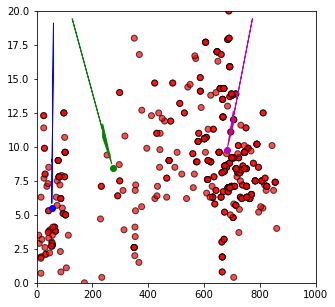

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


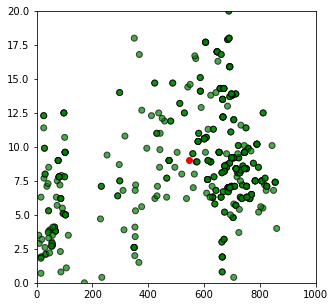

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


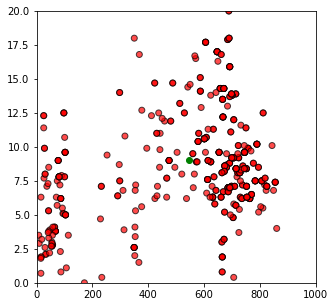

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


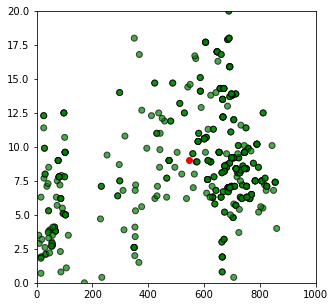

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


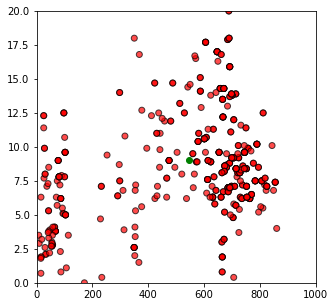

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


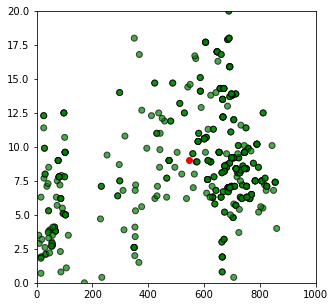

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


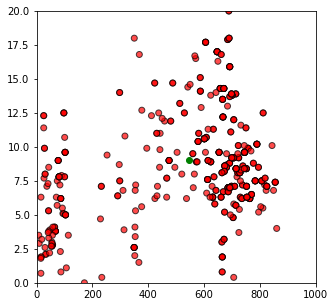

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


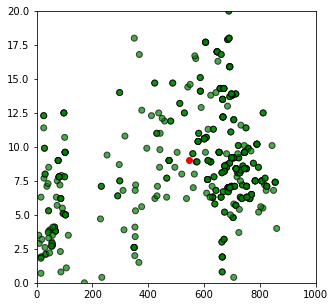

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


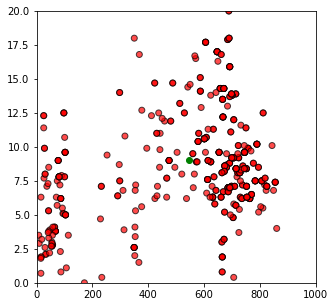

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


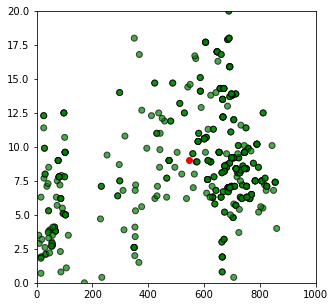

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


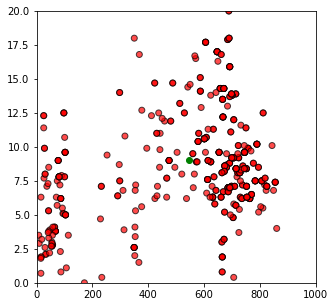

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


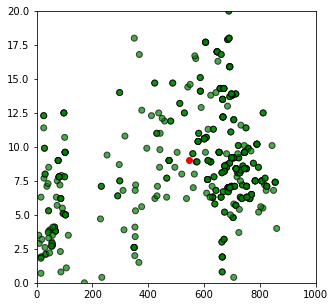

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


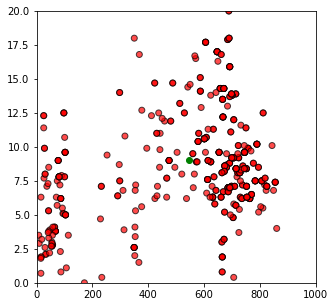

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


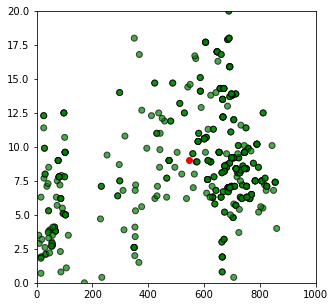

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


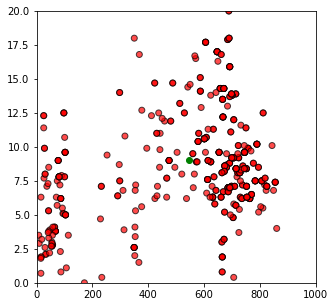

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


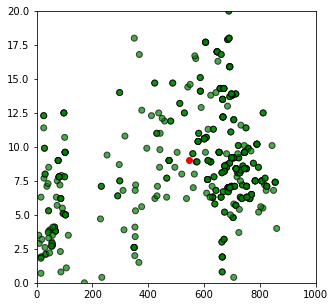

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


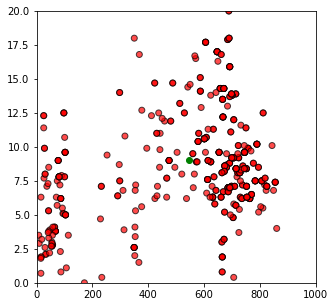

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


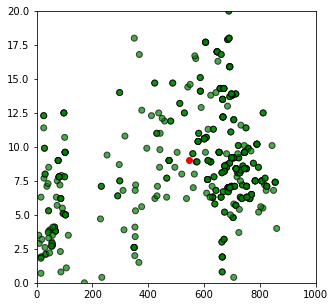

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


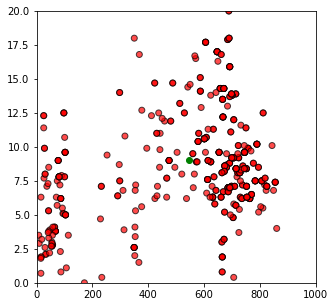

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


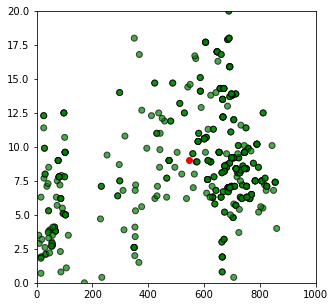

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


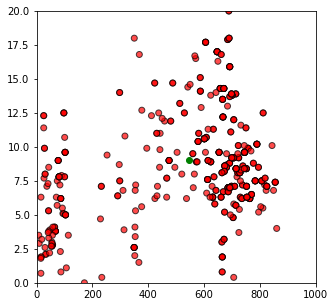

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


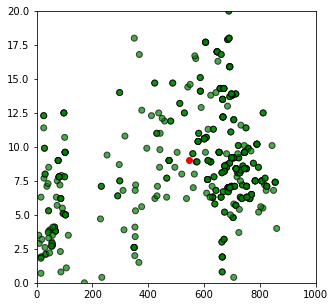

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


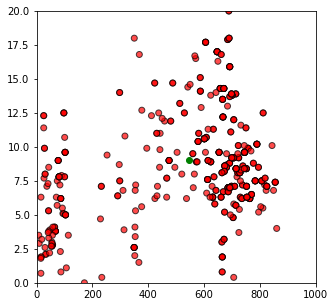

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


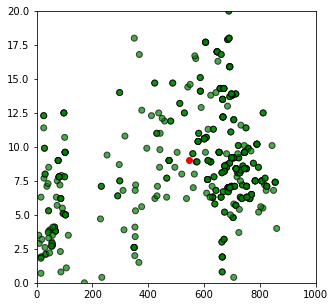

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


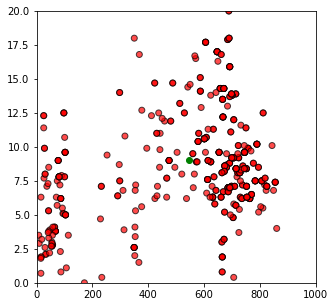

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


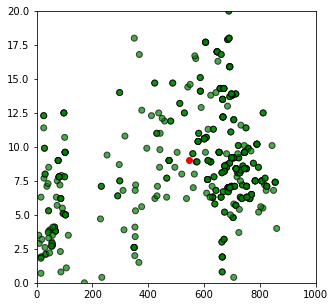

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


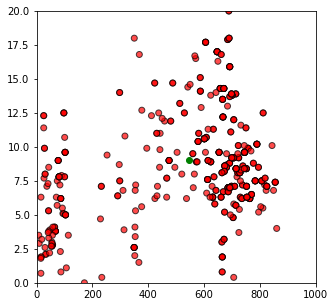

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


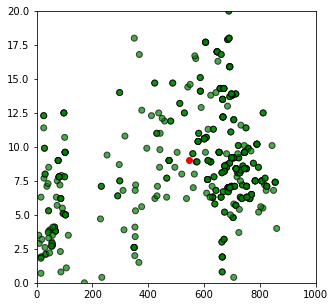

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


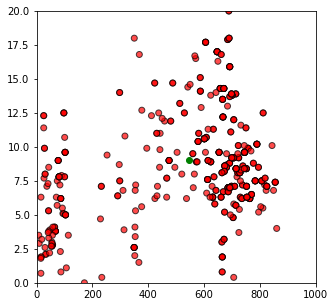

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


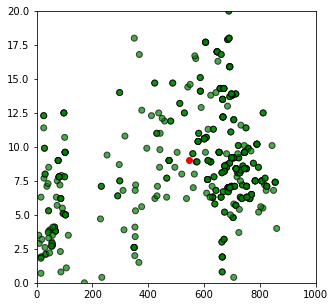

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


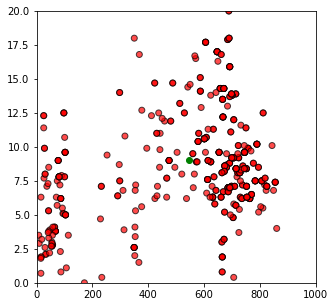

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


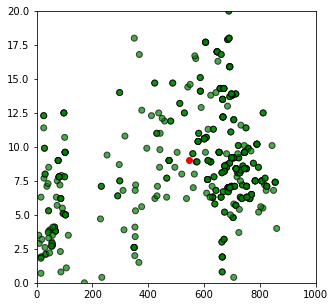

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


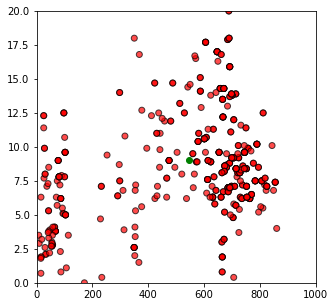

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


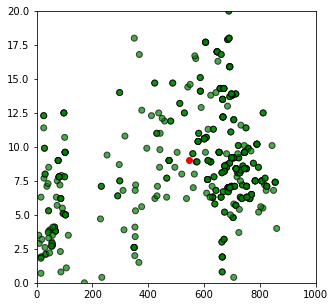

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


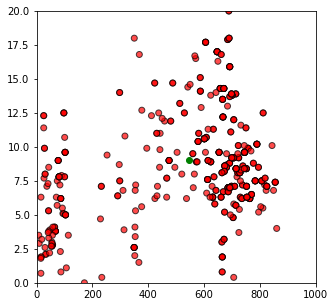

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


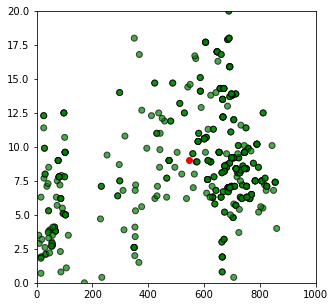

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


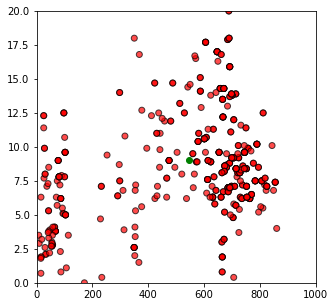

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


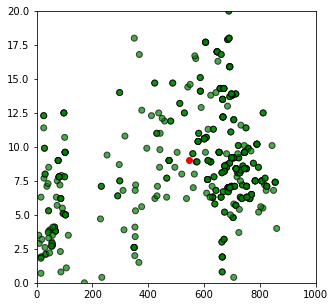

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


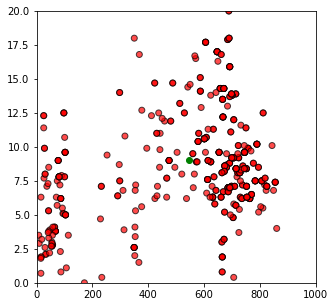

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


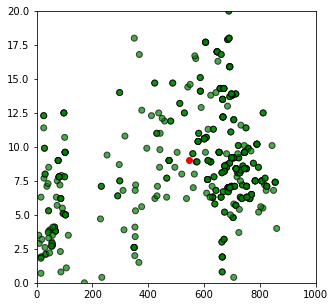

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


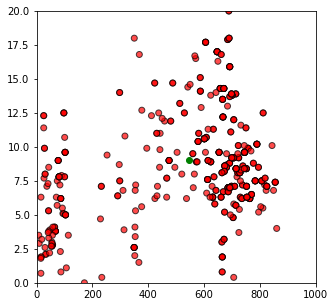

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


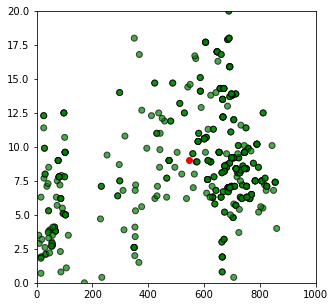

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


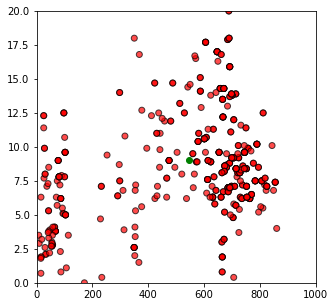

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


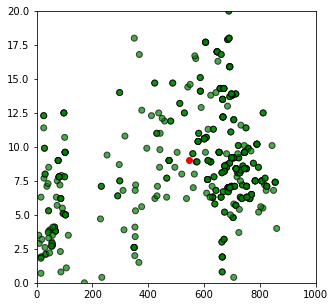

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


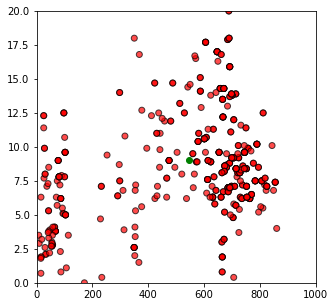

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


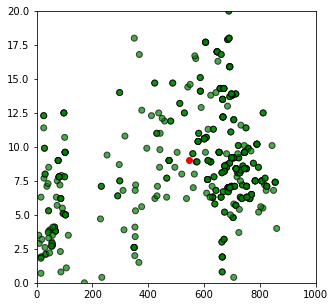

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


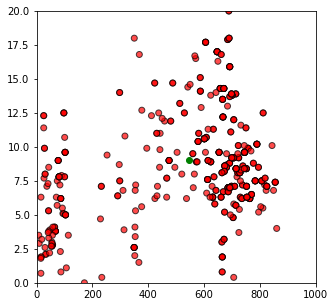

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


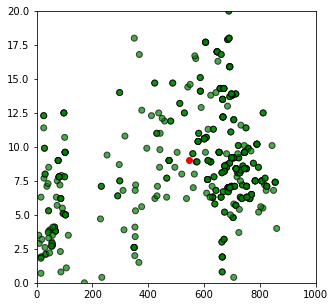

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


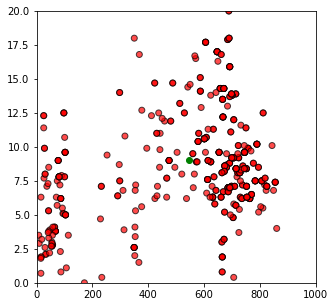

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


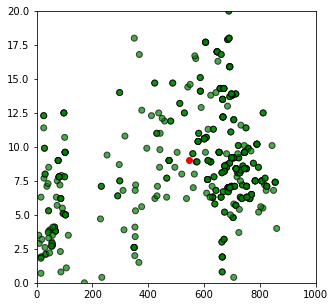

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


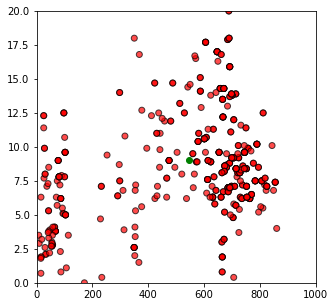

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


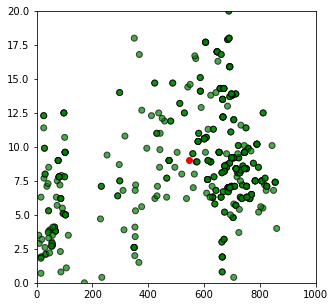

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


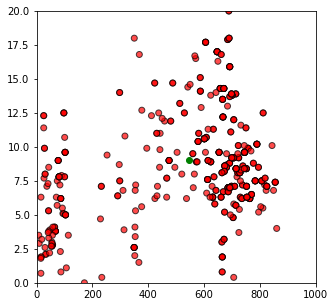

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


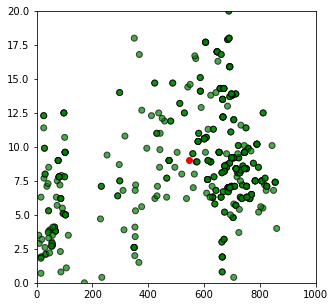

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


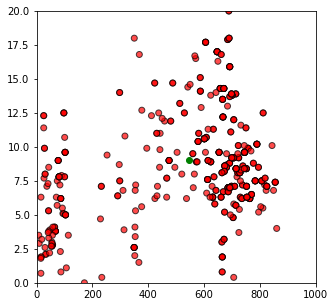

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


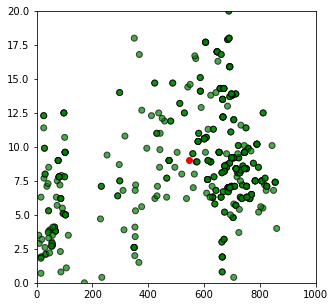

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


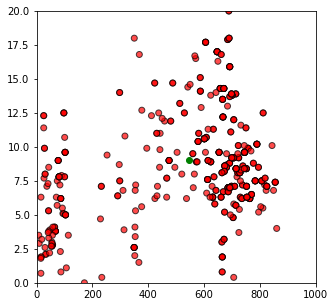

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


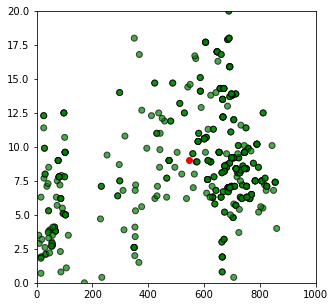

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


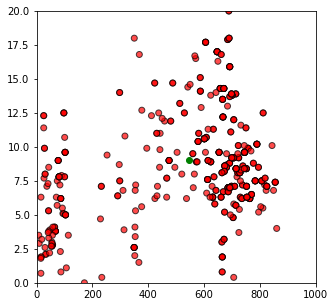

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


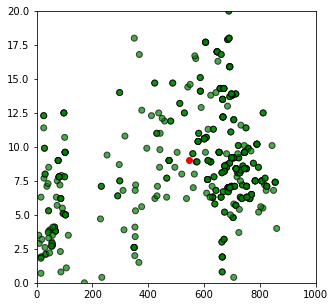

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


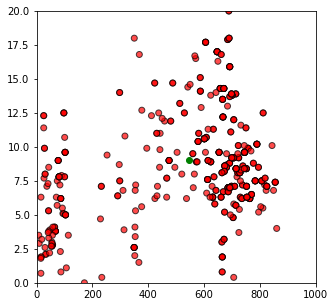

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


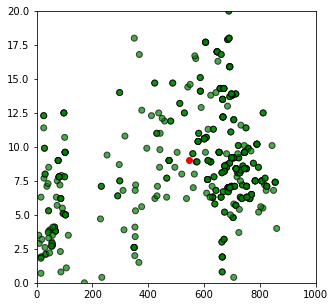

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


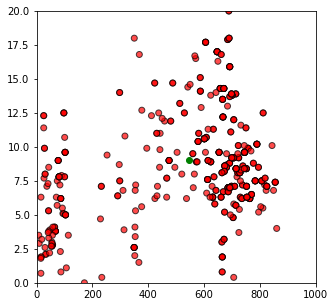

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


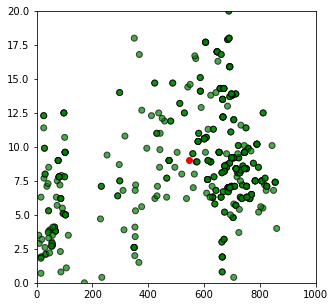

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


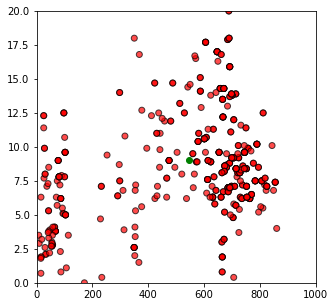

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


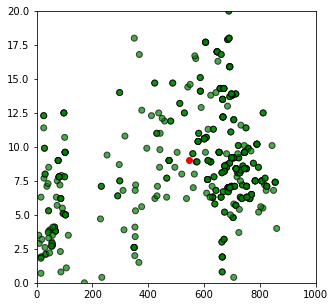

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


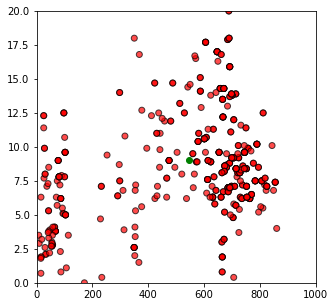

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


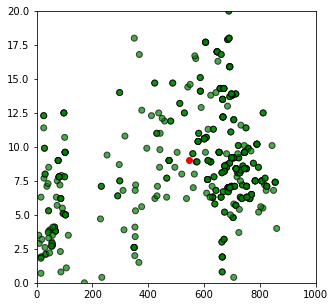

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


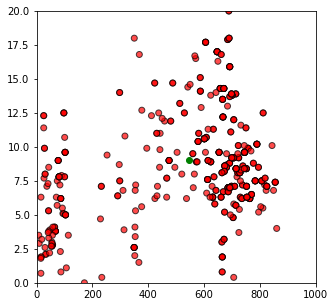

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


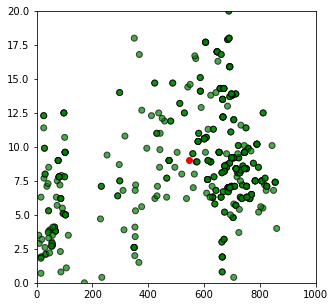

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


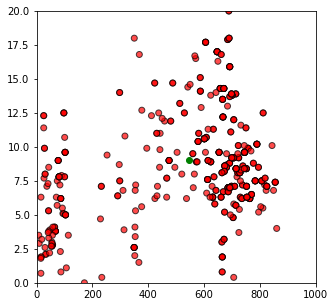

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


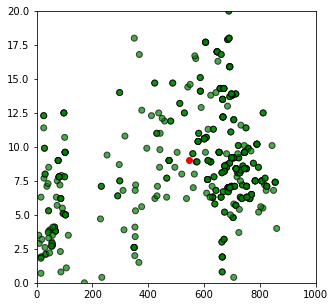

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


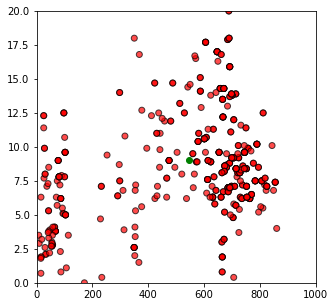

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


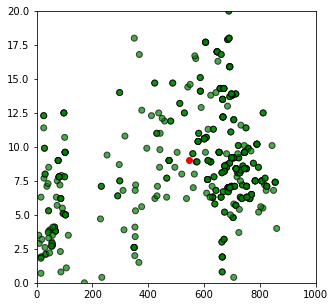

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


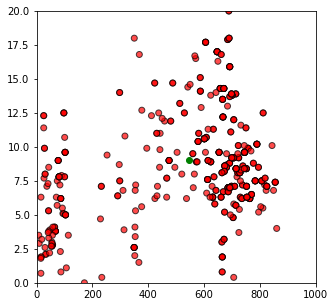

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


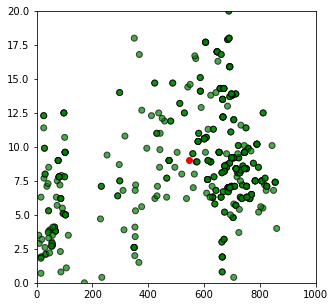

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


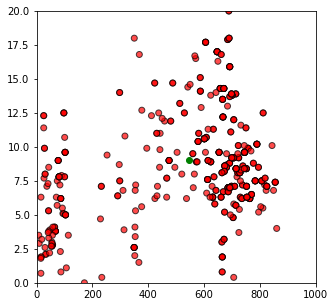

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


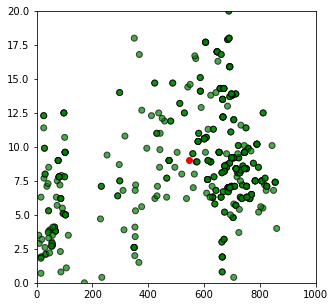

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


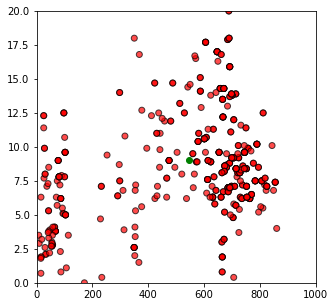

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


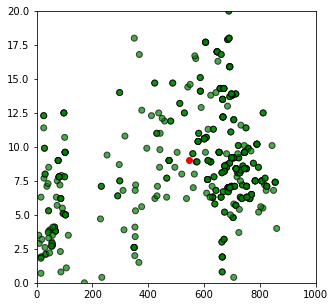

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


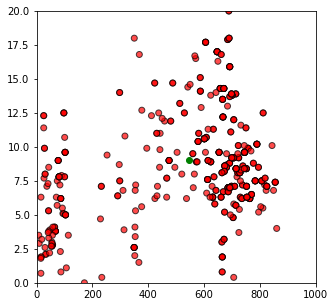

{1: [547.9400386847191, 9.021663442940042], 2: [nan, nan], 3: [nan, nan], 4: [nan, nan]}


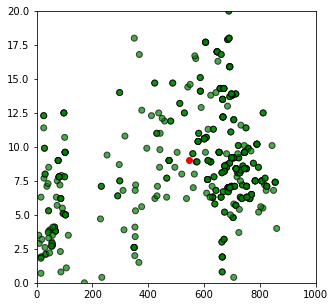

{1: [nan, nan], 2: [547.9400386847191, 9.021663442940042], 3: [nan, nan], 4: [nan, nan]}


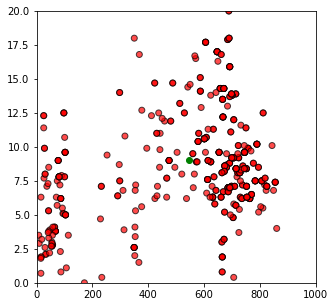

KeyboardInterrupt: 

In [47]:
import copy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('forestfires.csv',sep = ',')
df = pd.DataFrame(zip(df['DC'], df['ISI']), columns = ['f1', 'f2'])
df
k = 4

centroids = {
    i+1:[np.random.uniform(0,1000), np.random.uniform(19,20)] for i in range(k)
}
fig = plt.figure(figsize = (5,5))
plt.scatter(df['f1'], df['f2'], color = 'k')
colmap = {1 :'r', 2 : 'g', 3 : 'b', 4 : 'm'}
for i in centroids:
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0.1000)
plt.ylim(0,20)
plt.show()
print(centroids)

def euclid(df, centroids):
    klust = []
    for i in range(len(df)):
        ds = []
        for h in range(1,k+1):
            dist = 0
            for j in range(2):
                #print(dist)
                if(centroids[h][j] == 'nan' ):
                    print('PORCAPUPAZZA')
                dist = dist + (df.loc[i][j]-centroids[h][j])**2
            dist = np.sqrt(dist)
            if(dist == 'nan' ):
                    print('PORCAPUPAZZA')
            ds.append(dist)
        klust.append(np.argmin(ds) + 1)
    df['clusters'] = klust
    df['color'] = df['clusters'].map(lambda x: colmap[x])
    return df
#put the first clusters
df = euclid(df, centroids)
df.head()

def new_centroids(df, centr, k):
    names = ['f1', 'f2']
    for i in range(1,k+1):
        for j in range(2):
            centr[i][j] = np.mean(df[df['clusters']==i][names[j]])
    return centr


#o = 0
while True:
    closest_centroids = df['clusters'].copy(deep=True)
    old_centroids = copy.deepcopy(centroids)
    centroids = new_centroids(df, centroids, k)
    df = euclid(df, centroids)
    print(centroids)
    if closest_centroids.equals(df['clusters']):
        print('yeeeeeee')
        break   
    fig = plt.figure(figsize = (5,5))
    ax = plt.axes()
    colmap = {1 :'r', 2 : 'g', 3 : 'b', 4 : 'm'}
    plt.scatter(df['f1'], df['f2'], alpha = 0.7, color = df['color'], edgecolor = 'k')
    for i in centroids:
        plt.scatter(*centroids[i], color = colmap[i])
    plt.xlim(0,1000)
    plt.ylim(0,20)
    old = []
    for i in old_centroids.keys():
        l = []
        for j in range(0,2):
            l.append(old_centroids[i][j])
        old.append(l)
        dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
        dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
        ax.arrow(old[i-1][0], old[i-1][1], dx, dy, head_width=1, head_length=np.sqrt(dx**2+dy**2)*0.3, fc=colmap[i], ec=colmap[i])
    plt.show()